In [2]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print('class labels: ', np.unique(y))

class labels:  [0 1 2]


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=1, stratify=y)

print('labels counts in y: ', np.bincount(y))
print('labels counts in y_train: ', np.bincount(y_train))
print('labels counts in y_test: ', np.bincount(y_test))


labels counts in y:  [50 50 50]
labels counts in y_train:  [35 35 35]
labels counts in y_test:  [15 15 15]


In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0 = 0.1, random_state = 1)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
misclass = (y_test != y_pred).sum()
print(f'misclassified examples: {misclass}')

misclassified examples: 1


In [6]:
from sklearn.metrics import accuracy_score
print(f'Accuracy: {round(ppn.score(X_test_std, y_test), 3)}')

Accuracy: 0.978


In [9]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y,classifier,resolution=0.02, test_idx = None):
    markers = ('o','s','^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'grey', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:,0].min() -1, X[:,0].max() +1
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max() +1
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max, resolution),
                        np.arange(x2_min,x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],
                    y=X[y==cl,1],
                    alpha = 0.8,
                    c=colors[idx],
                    marker = markers[idx],
                    label = f'Class {cl}',
                    edgecolor = 'black')
        
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:,0], X_test[:,1],
                    c='none', edgecolor='black', alpha=1.0,
                    linewidth=1,marker='o',
                    s=100,label='Test set')


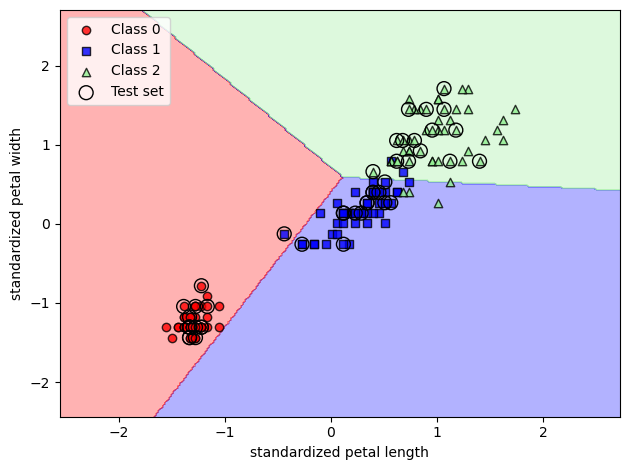

In [10]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined,
                        classifier=ppn, test_idx=range(105,150))
plt.xlabel('standardized petal length')
plt.ylabel('standardized petal width')
plt.legend(loc= 'upper left')
plt.tight_layout()
plt.show()


In [13]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))
z = np.arange(-7,7,0.1)
sigma_z = sigmoid(z)

def loss_1(z):
    return - np.log(sigmoid(z))
def loss_0(z):
    return - np.log(1 -sigmoid(z))

In [14]:
class LogisticRegressionGD:
    def __init__(self, eta=0.01, n_iter = 50, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale=0.01, size = X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y-output)
            self.w_ += self.eta*2.0*X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta*2.0*errors.mean()
            loss = (-y.dot(np.log(output))-((1-y).dot(np.log(1-output)))/X.shape[0])
            
            self.losses_.append(loss)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def activation(self,z):
        return 1. / (1. + np.exp(-np.clip(z,-250, 250)))
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5,1,0)
    




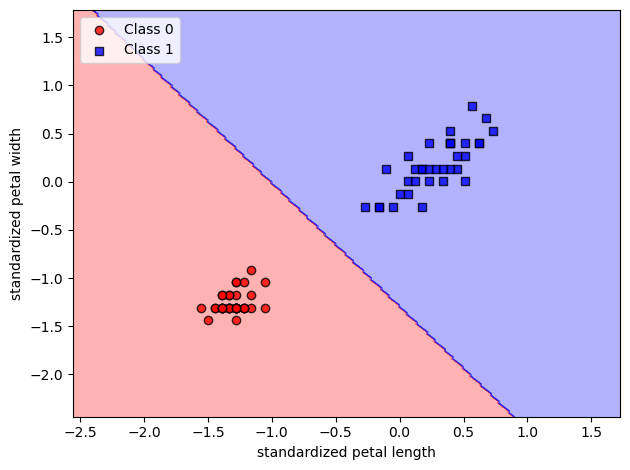

In [15]:
X_train_01_subset = X_train_std[(y_train==0)|(y_train==1)]
y_train_01_subset = y_train[(y_train==0)|(y_train==1)]

lrgd = LogisticRegressionGD(eta =0.3, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)
plot_decision_regions(X=X_train_01_subset,
                        y=y_train_01_subset,
                        classifier=lrgd)
plt.xlabel('standardized petal length')
plt.ylabel('standardized petal width')
plt.legend(loc= 'upper left')
plt.tight_layout()
plt.show()



/Users/The_real_G/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


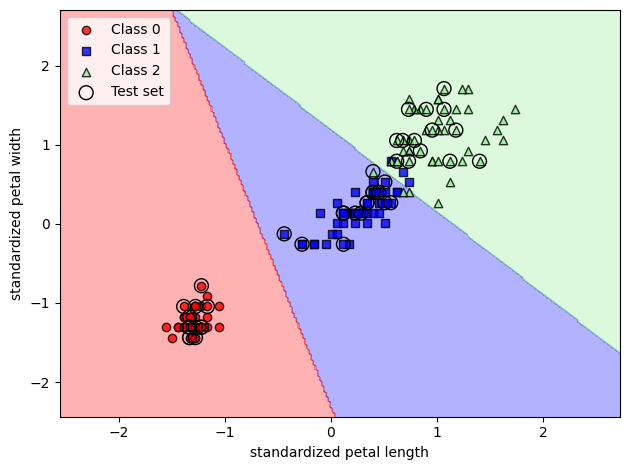

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=lr, test_idx=range(105,150))
plt.xlabel('standardized petal length')
plt.ylabel('standardized petal width')
plt.legend(loc= 'upper left')
plt.tight_layout()
plt.show()

In [20]:
lr.predict(X_test_std[0,:].reshape(1,-1))

array([2])